In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import seaborn as sb
import numpy as np
from pandas.api.types import CategoricalDtype
from itertools import cycle, islice
import os
import shutil
import collections
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as tick
#!pip install mpl-axes-aligner


import mpl_axes_aligner


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
#os.mkdir('carbon_tax_figures_updates')

In [3]:
sb.set(style='whitegrid', font_scale=1.4)

In [4]:
# map tech categories to energy sources
col_order = ['Biomass','Geothermal','Hydro','Nuclear','Coal','Natural Gas','Solar','Wind', 'Pumped Hydro',\
             'Battery', 'Hydrogen']
#map powerplant categories
map_plants = dict()
map_plants['COAL'] = 'Coal'
map_plants['GEO'] = 'Geothermal'
map_plants['BE'] = 'Biomass'
map_plants['BIO'] = 'Biomass'
map_plants['HYDPS'] = 'Pumped Hydro'
map_plants['HYDCONV'] = 'Hydro'
map_plants['HYDSM'] = 'Hydro'
map_plants['NGA'] = 'Natural Gas'
map_plants['WND'] = 'Wind'
map_plants['SOL'] = 'Solar'
map_plants['URN'] = 'Nuclear'
map_plants['Batt'] = 'Battery'
map_plants['H2'] = 'Hydrogen'

color_dict = dict()
color_dict['Coal'] = 'dimgray'
color_dict['Geothermal'] = 'pink'
color_dict['Biomass'] = 'darkseagreen'
color_dict['Hydro'] = 'b'
color_dict['Natural Gas'] = 'peru'
color_dict['Wind'] = 'lightskyblue'
color_dict['Solar'] = 'lemonchiffon'
color_dict['Nuclear'] = 'darkorange'
color_dict['Pumped Hydro'] = 'lightcoral'
color_dict['Battery'] = 'red'
color_dict['Hydrogen'] = '#e5ae38'
color_dict['Curtailment'] = 'darkgrey'

color_dict['commercial'] = 'darkred'
color_dict['industrial'] = 'blue'
color_dict['transport'] = 'darkorange'
color_dict['residential'] = 'lightskyblue'

color_dict['Petroleum'] = '#ABABAB'



tech_transport = dict()
tech_transport['T_Liquids'] = 'Synthetic Fuel'
tech_transport['DSL_EA'] = 'Diesel'
tech_transport['BIODSL'] = 'Biodiesel'
tech_transport['MGO_EA'] = 'Diesel'
tech_transport['RFO_EA'] = 'Other Fossil'
tech_transport['CNG_EA'] = 'Other Fossil'
tech_transport['T_LPG_EA'] = 'Other Fossil'
tech_transport['T_LNG_EA'] = 'Other Fossil'
tech_transport['ELC'] = 'Electricity'
tech_transport['ELC_TRN'] = 'Electricity'
tech_transport['ELC_HDV_CHRG'] = 'drop'
tech_transport['ELC_LDV_CHRG'] = 'drop'
tech_transport['BIO_JTF'] = 'Biodiesel'
tech_transport['LH2'] = 'Hydrogen'
tech_transport['H2'] = 'Hydrogen'
tech_transport['JTF_EA'] = 'Jet Fuel'
tech_transport['ETHANOL'] = 'Ethanol'
tech_transport['GAS_EA'] = 'Gasoline'

tech_commercial = dict()
tech_commercial['C_DISTOIL_EA'] = 'Other Fossil'
tech_commercial['C_NGA_EA'] = 'Natural Gas'
tech_commercial['ELC_COM'] = 'Electricity'
tech_commercial['SNG_100'] = 'Synthetic Natural Gas'
tech_commercial['C_RFO_EA'] = 'Other Fossil'

tech_residential= dict()
tech_residential['R_BIO_EA'] = 'Biomass'
tech_residential['R_NGA_EA'] = 'Natural Gas'
tech_residential['ELC_RES'] = 'Electricity'
tech_residential['ELCDIST_R'] = 'Electricity'
tech_residential['SNG_100'] = 'Synthetic Natural Gas'
tech_residential['R_DISTOIL_EA'] = 'Other Fossil'
tech_residential['R_LPG_EA'] = 'Other Fossil'
tech_residential['RWHSOL'] = 'Residential Solar'
tech_residential['H2_100'] = 'Hydrogen'


tech_industrial = dict()
tech_industrial['ELC'] = 'Electricity'
tech_industrial['I_COAL'] = 'Coal'
tech_industrial['I_GSL_EA'] = 'Gasoline'
tech_industrial['I_NGA'] = 'Natural Gas'
tech_industrial['I_OTH_EA'] = 'Other Fossil'
tech_industrial['I_LPG'] = 'Other Fossil'
tech_industrial['I_DFO'] = 'Diesel'
tech_industrial['I_RFO'] = 'Residual Fuel Oil'
tech_industrial['I_REN'] = 'Biomass'
tech_industrial['SNG_100'] = 'Synthetic Natural Gas'
tech_industrial['H2_100'] = 'Hydrogen'

tech_colormap = dict()
tech_colormap['Synthetic Fuel'] = '#595959'
tech_colormap['Other Fossil'] = '#ABABAB'
tech_colormap['Jet Fuel'] = '#8172B2'
tech_colormap['Diesel'] = 'darkorange'
tech_colormap['Gasoline'] = '#C44E52'
tech_colormap['Electricity'] = '#55A868'
tech_colormap['Biodiesel'] = 'steelblue'
tech_colormap['Ethanol'] = '#64B5CD'
tech_colormap['Hydrogen'] = '#e5ae38'

tech_colormap['Natural Gas'] = 'peru'
tech_colormap['Synthetic Natural Gas'] = 'tan'

tech_colormap['Biomass'] = 'darkseagreen'
tech_colormap['Residential Solar'] = 'lemonchiffon'
tech_colormap['Coal'] = 'dimgray'

tech_colormap['Residual Fuel Oil'] = 'chocolate'
tech_colormap['Distillate Oil'] = '#ABABAB'
tech_colormap['Petroleum'] = '#ABABAB'
tech_colormap['Geothermal'] = 'pink'

tech_colormap['Hydro'] = 'b'
tech_colormap['Other Renewables'] = 'b'
tech_colormap['Wind'] = 'lightskyblue'
tech_colormap['Solar'] = 'lemonchiffon'
tech_colormap['Nuclear'] = 'darkorange'

tech_colormap['ICEV-E10'] = '#C44E52'
tech_colormap['CI-Diesel'] = 'darkorange'
tech_colormap['ICEV-CNG'] = 'peru'
tech_colormap['EV'] = '#55A868'
tech_colormap['ICEV-E85'] = '#64B5CD'
tech_colormap['PHEV'] = 'dimgray'
tech_colormap['ICEV-LPG'] = '#ABABAB'
tech_colormap['CI-B20'] = 'darkseagreen'


color_dict = dict()
color_dict['DAC to sequestration'] = 'darkorange'
color_dict['CC to sequestration'] = 'b'
color_dict['DAC to fuels'] = 'darkred'
color_dict['CC to fuels'] = 'lightskyblue'

color_dict['Coal'] = 'dimgray'
color_dict['Geothermal'] = 'pink'
color_dict['Biomass'] = 'darkseagreen'
color_dict['Hydro'] = 'b'
color_dict['Natural Gas'] = 'peru'
color_dict['Wind'] = 'lightskyblue'
color_dict['Solar'] = 'lemonchiffon'
color_dict['Nuclear'] = 'darkorange'
color_dict['Pumped Hydro'] = 'lightcoral'
color_dict['Battery'] = 'red'
color_dict['Hydrogen'] = '#e5ae38'
color_dict['Curtailment'] = 'darkgrey'

color_dict['Commercial'] = '#C44E52'
color_dict['Industrial'] = 'darkorange'
color_dict['Transport'] = '#8172B2'
color_dict['Residential'] = 'lightskyblue'
color_dict['Supply'] = 'darkgrey'
color_dict['Electric'] = '#55A868'
color_dict['Petroleum'] = '#ABABAB'
color_dict['Other Renewables'] = 'b'

color_dict['NG SMR (CCS) - Hydrogen'] = 'peru'
color_dict['BECCS - Electricity'] = 'darkseagreen'
color_dict['BECCS - Hydrogen'] = '#e5ae38'
color_dict['DAC'] = 'red'


color_dict['TotalInvestment_discounted'] = 'b'
color_dict['TotalInvestment'] = 'b'

In [5]:
def func_stacked_plot(df_list, ax = None, col_order = ['Biomass','Geothermal','Hydro','Nuclear',\
                                                       'Coal','Natural Gas','Solar','Wind','Pumped Hydro', 'Battery', 'Hydrogen'], loc='default', color_dict= color_dict):
    # df list needs to come from one of the prep functions above
    bar_width = 1
    if ax is None:
        ax = plt.gca()        
    # specify order of energy source stack here
    
#     fig, ax = plt.subplots(figsize=(8, 6))

    num_dfs = len(df_list)
    col_spacing = [x - (num_dfs / 1.8 - 0.5) for x in np.arange(num_dfs)]

    for df_in_list, spacing in zip(df_list, col_spacing):
        col_order_inst = [
            y for y in col_order for x in df_in_list.index if x == y
        ]
        # plotting the first set of bars to cumulatively add on
        df_in_list = df_in_list.loc[col_order_inst, :]
        ax.bar(df_in_list.columns + spacing,
               df_in_list.iloc[0, :],
               label=df_in_list.index[0],
               width=bar_width,
               color=color_dict[df_in_list.index[0]])

        cumsum = df_in_list.iloc[0, :]

        for i in np.arange(1, len(df_in_list)):
            ax.bar(df_in_list.columns + spacing,
                   df_in_list.iloc[i, :],
                   bottom=cumsum,
                   label=df_in_list.index[i],
                   width=bar_width,
                   color=color_dict[df_in_list.index[i]])
            cumsum = cumsum + df_in_list.iloc[i, :]
        
            
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
              if l not in labels[:i]]
    if loc=='inside_upper_left':
        plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs
    elif loc=='inside_upper_right':
        plt.legend(*zip(*unique[::-1]), loc='upper right', frameon=False) # changing plt to ax gives you legends for each of the graphs
    else:
        plt.legend(*zip(*unique[::-1]), loc='upper left',bbox_to_anchor=(1.01, 1), frameon=False) # changing plt to ax gives you legends for each of the graphs
    ax.tick_params(axis = 'x', labelrotation=90)
    return ax

In [6]:
#return fuel consumption dataframe for a sector
def stacked_penergy_sector(con, scenario, sector, region):
    if sector =='commercial':
        fuels_list = ['C_DISTOIL_EA','C_LPG_EA','C_NGA_EA','C_RFO_EA','ELC_COM','SNG_100','H2_100', 'ELCDIST_R']
    elif sector=='residential':
        fuels_list = ['R_DISTOIL_EA','R_LPG_EA','R_NGA_EA','RWHSOL', 'R_BIO_EA','ELC_RES','SNG_100','H2_100', 'ELCDIST_R']
    elif sector == 'transport':
        fuels_list = ['MGO_EA','DSL_EA','GAS_EA','CNG_EA','ETHANOL', 'JTF_EA', 'RFO_EA', 'T_LPG_EA','MEOH', 'T_Liquids', 'ELC_TRN', 'BIODSL', 'BIO_JTF', 'ELCDIST_R', 'LH2', 'H2']
    elif sector == 'industrial':
        fuels_list = ['I_COAL', 'I_DFO', 'I_GSL_EA',  'I_NGA', 'I_REN', 'I_RFO', 'I_LPG', 'I_OTH_EA', 'SNG_100', 'H2_100', 'ELC', 'ELCDIST_R']
    else:
        print('Sector input is either residential, commercial, industrial, or transport')
    
    if region=='All':
        query = "SELECT input_comm, t_periods, SUM(vflow_in) AS vflow_in FROM Output_VFlow_In \
    WHERE scenario='" + scenario + "' AND sector='" + sector + \
    "' AND vflow_in > 1e-6 GROUP BY input_comm, t_periods"
    else:
        query = "SELECT input_comm, t_periods, SUM(vflow_in) AS vflow_in FROM Output_VFlow_In \
    WHERE scenario='" + scenario + "' AND sector='" + sector + "' AND regions='"+ str(region) +\
    "' AND vflow_in > 1e-6 GROUP BY input_comm, t_periods"

    df_sector = pd.read_sql_query(query, con)
    df_sector = df_sector[df_sector['input_comm'].isin(fuels_list)]
    
    if (df_sector['input_comm'].str.contains('ELC_').any()):
        df_sector = df_sector[df_sector['input_comm']!='ELC']

    
    df_sector = df_sector.pivot_table(values='vflow_in', index='input_comm', columns='t_periods')
    df_sector.fillna(0, inplace=True)
    return df_sector

In [8]:
# os.mkdir('carbon_tax_figures_updates')

In [13]:
# list_of_DBs = ['US_9R_8D_CT_neg50.sqlite', 'US_9R_8D_CT_neg10.sqlite', 'US_9R_8D_CT_0.sqlite',  \
#              'US_9R_8D_CT_10.sqlite','US_9R_8D_CT_50.sqlite','US_9R_8D_CT_100.sqlite',\
#                'US_9R_8D_CT_250.sqlite',\
#                'US_9R_8D_CT_400.sqlite','US_9R_8D_CT_600.sqlite']

# list_of_DBs = ['US_9R_8D_CT_neg50.sqlite', 'US_9R_8D_CT_neg10.sqlite', 'US_9R_8D_CT_0.sqlite',  \
#              'US_9R_8D_CT_10.sqlite', 'US_9R_8D_CT_50.sqlite','US_9R_8D_CT_100.sqlite','US_9R_8D_CT_200.sqlite',\
#                'US_9R_8D_CT_400.sqlite','US_9R_8D_CT_600.sqlite','US_9R_8D_CT_800.sqlite','US_9R_8D_CT_1000.sqlite']

list_of_DBs = ['US_9R_8D_CTneg10.sqlite','US_9R_8D_CT0.sqlite','US_9R_8D_CT10.sqlite', 'US_9R_8D_CT100.sqlite', 'US_9R_8D_CT200.sqlite', \
               'US_9R_8D_CT300.sqlite', 'US_9R_8D_CT400.sqlite', 'US_9R_8D_CT500.sqlite']
list_of_scenarios  = ['test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run', \
                      'test_run', 'test_run','test_run','test_run','test_run']

list_of_conns = [sqlite3.connect(db) for db in list_of_DBs]

In [14]:
query = "SELECT t_periods, sum(emissions) as emissions FROM Output_Emissions \
    WHERE emissions_comm='co2' GROUP BY t_periods"
emiss_store = dict()
for conn, db in zip(list_of_conns, list_of_DBs):
    df_read_emissions = pd.read_sql_query(query, conn)
    df_read_emissions['emissions'] /= 1000
    emiss_store[db] = df_read_emissions.set_index('t_periods')
    

In [15]:
query = "SELECT * FROM Output_Duals WHERE constraint_name LIKE '%EmissionLimit%' AND constraint_name LIKE '%co2%' \
AND constraint_name LIKE '%global%'"
duals_store = dict()
for conn, db in zip(list_of_conns, list_of_DBs):
    df_duals = pd.read_sql(query, conn)
    df_duals['t_periods'] = [int(x[1]) for x in df_duals['constraint_name'].str.split(',')]
    df_duals['shadow_price'] = -1*df_duals['dual']*1000
    df_duals.set_index('t_periods',inplace=True)
    duals_store[db] = df_duals


In [16]:
base = 'US_9R_8D_CT0.sqlite'
emis_reductions = dict()
for db in list_of_DBs:
    emis_reductions[db] = emiss_store[base] - emiss_store[db]


In [34]:
map_scenario_names = dict()
map_scenario_names['neg50.'] = '-50$/tonne'
map_scenario_names['neg10.'] = '-10$/tonne'
map_scenario_names['10.'] = '10$/tonne'
map_scenario_names['50.'] = '50$/tonne'
map_scenario_names['100.'] = '100$/tonne'
map_scenario_names['200.'] = '200$/tonne'
map_scenario_names['300.'] = '300$/tonne'
map_scenario_names['400.'] = '400$/tonne'
map_scenario_names['500.'] = '500$/tonne'
map_scenario_names['600.'] = '600$/tonne'
map_scenario_names['800.'] = '800$/tonne'
map_scenario_names['1000.'] = '1000$/tonne'


map_scenario_names[''] = 'No carbon tax'

In [18]:
output_list = []
scen_name_all = []
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):

    query = "SELECT t_periods, tech, sum(vflow_out) FROM Output_VFlow_Out WHERE input_comm LIKE 'ethos%' AND tech NOT LIKE '%_emissions%' \
    GROUP BY t_periods, tech"
    df_s = pd.read_sql_query(query, conn)

    ethos_tech_map = dict()
    ethos_tech_map['E_SOLPV'] = 'Solar'
    ethos_tech_map['SOLELC'] = 'Solar'
    ethos_tech_map['E_WND'] = 'Wind'
    ethos_tech_map['E_OFWND_N'] = 'Wind'
    ethos_tech_map['E_GEO'] = 'Other Renewables'
    ethos_tech_map['E_HYD'] = 'Other Renewables'
    ethos_tech_map['Corn'] = 'Biomass'
    ethos_tech_map['Herbaceous'] = 'Biomass'
    ethos_tech_map['Soybeans'] = 'Biomass'
    ethos_tech_map['Waste'] = 'Biomass'
    ethos_tech_map['Woody'] = 'Biomass'
    ethos_tech_map['DFO'] = 'Petroleum'
    ethos_tech_map['DISTOIL'] = 'Petroleum'
    ethos_tech_map['IMPRESNGA'] = 'Natural Gas'
    ethos_tech_map['IMPELCNGA_S3'] = 'Natural Gas'
    ethos_tech_map['IMPCOMNGA'] = 'Natural Gas'
#     ethos_tech_map['NGA'] = 'Natural Gas'
    ethos_tech_map['INDNG'] = 'Natural Gas'
    ethos_tech_map['CNG'] = 'Natural Gas'
    ethos_tech_map['LNG'] = 'Natural Gas'
    ethos_tech_map['COAL'] = 'Coal'
    ethos_tech_map['COAB'] = 'Coal'
    ethos_tech_map['COAS'] = 'Coal'
    ethos_tech_map['URN'] = 'Nuclear'
    ethos_tech_map['RFO'] = 'Petroleum'
    ethos_tech_map['BIO'] = 'Biomass'
    ethos_tech_map['REN'] = 'Biomass'
    ethos_tech_map['GAS'] = 'Petroleum'
    ethos_tech_map['JTF'] = 'Petroleum'
    ethos_tech_map['LPG'] = 'Petroleum'
    ethos_tech_map['DSL'] = 'Petroleum'
    ethos_tech_map['GSL'] = 'Petroleum'
    ethos_tech_map['MGO'] = 'Petroleum'
    ethos_tech_map['IMPINDOTH'] = 'Petroleum'


    for key in ethos_tech_map.keys():
        mask = df_s['tech'].str.contains(key)
        df_s.loc[mask,'tech_rev'] = ethos_tech_map[key]
    
    df_s_pivot = df_s.groupby(by=['t_periods', 'tech_rev']).sum().reset_index()
    df_s_pivot = df_s_pivot.pivot_table(index='tech_rev', columns='t_periods')
    df_s_pivot.fillna(0, inplace=True)
    df_s_pivot.columns = [x[1] for x in df_s_pivot.columns]
    
    df_s_pivot = df_s_pivot.loc[['Coal','Petroleum','Natural Gas','Nuclear','Other Renewables','Biomass','Solar','Wind']]
    df_s_pivot /= 1000
    output_list.append(df_s_pivot)
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('CT')[1]]
    except:
        scen_name = map_scenario_names['']
        
    scen_name_all.append(scen_name)

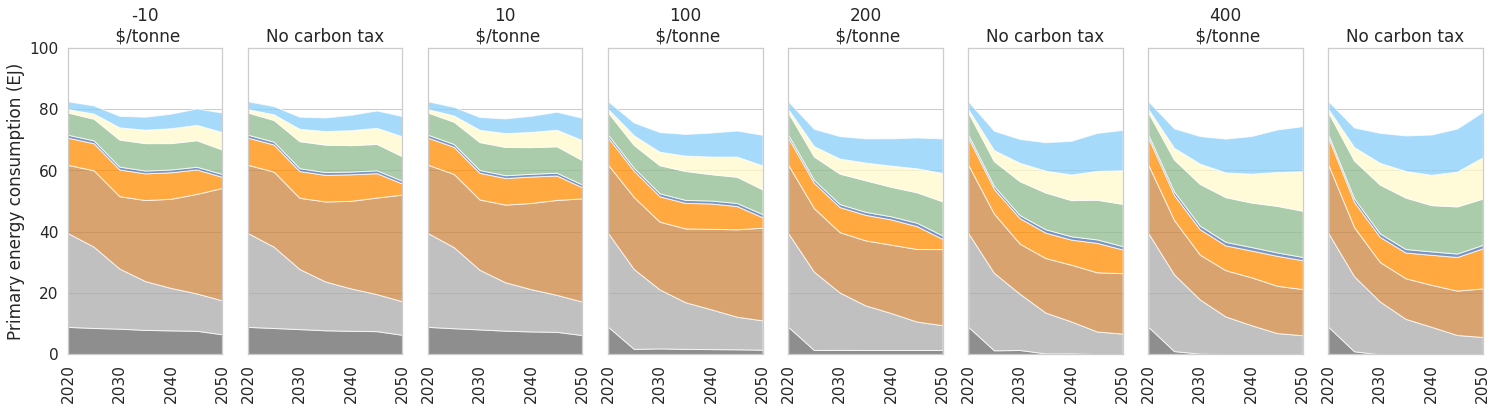

In [19]:
fig, ax = plt.subplots(figsize=(26,6))
for ind_iter in np.arange(len(output_list)):
    subp = plt.subplot(1,len(output_list)+2,ind_iter+1)
    plt.stackplot(output_list[ind_iter].columns, output_list[ind_iter],  alpha = 0.75, labels=output_list[ind_iter].index, \
                     colors = output_list[ind_iter].index.map(tech_colormap))
    
    
    if ind_iter==0:
        plt.ylabel('Primary energy consumption (EJ)')
    else:
        subp.set(yticklabels=[])

    plt.grid(axis='x')
    plt.xticks(rotation='vertical')
    plt.xlim([output_list[ind_iter].columns.min(), output_list[ind_iter].columns.max()])
    plt.title(scen_name_all[ind_iter].replace('$/tonne','\n $/tonne'))
    plt.ylim([0, 100])

# handles, labels = subp.get_legend_handles_labels()
# unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
#           if l not in labels[:i]]
# subp = plt.subplot(1,len(output_list)+2,ind_iter+2)
# subp.legend(handles[::-1], labels[::-1], loc='upper left', frameon=False)

# dummy_df = pd.DataFrame(index=output_list[ind_iter].index, columns=output_list[ind_iter].columns)
# dummy_df.transpose().plot.bar(kind='stacked',ax=subp, color = output_list[ind_iter].index.map(tech_colormap))
# subp.set(yticklabels=[],xticklabels=[] )
# plt.legend(loc='upper left')
# plt.grid(False)
# plt.axis('off')

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_all_primaryenergy.jpg')


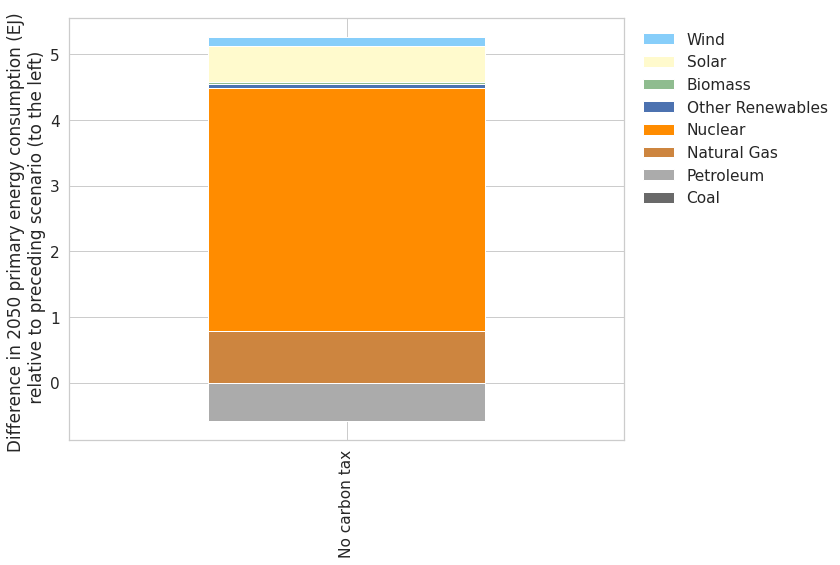

In [24]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(12,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(color_dict), legend=False)
# plt.ylim([-2000, 3000])
plt.ylabel('Difference in 2050 primary energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend(frameon=False)

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]

plt.legend(*zip(*unique[::-1]), loc='upper left',bbox_to_anchor=(1.01, 1), frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

# fig, ax = plt.subplots(figsize=(10,8))
# df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap))
# handles, labels = subp.get_legend_handles_labels()
# unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
#           if l not in labels[:i]]
# plt.legend(*zip(*unique[::-1]), loc='upper left',bbox_to_anchor=(1.01, 1), frameon=False) # changing plt to ax gives you legends for each of the graphs

# plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_all_primaryenergy_diff.jpg')


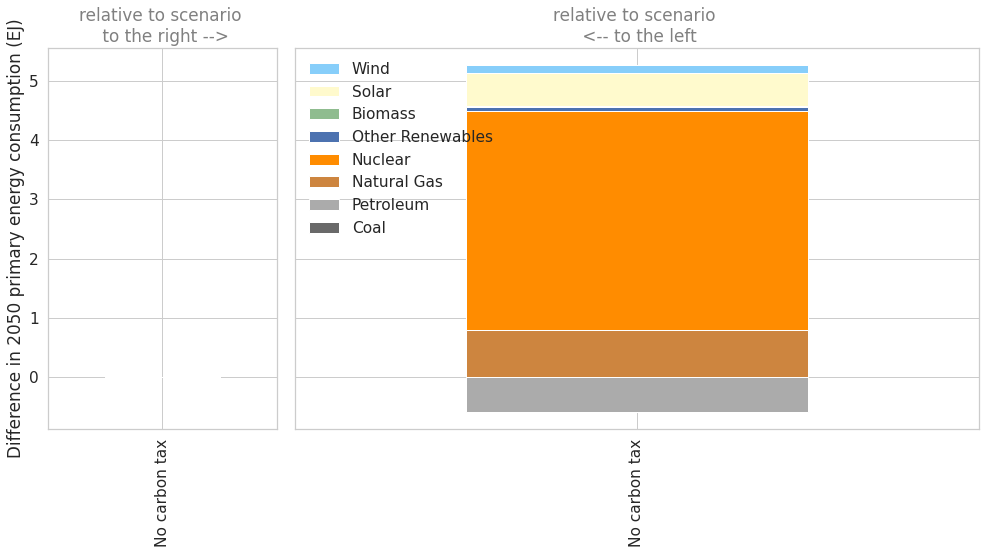

In [22]:
fig, ax = plt.subplots(1,2,figsize=(14,8), sharey='row', gridspec_kw={'width_ratios': [1, 3]})
ax1 = plt.subplot(1,2,1)

i = 0
df_diff_all = pd.DataFrame()
ind_notax = list_of_DBs.index('US_9R_8D_CT0.sqlite')
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if ('neg' in db) | ('US_9R_8D_CT0' in db):
        if i!=ind_notax:
            df_diff = output_list[i] - output_list[i+1]
        else:
            df_diff = output_list[i] - output_list[ind_notax]

        try:
            scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
        except:
            scen_name = map_scenario_names['']
        df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
        i+=1
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax1, color = df_diff_all.index.map(color_dict), legend=False)
# ax1.set_ylabel('Difference in 2050 primary energy consumption (EJ) \n relative to succeeding scenario (to the right)')
ax1.set_title('relative to scenario \n to the right -->',color='grey')
ax2 = plt.subplot(1,2,2)

i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if 'neg' in db:
        pass
    else:
        if i!=ind_notax:
            df_diff = output_list[i] - output_list[i-1]
        else:
            df_diff = output_list[i] - output_list[ind_notax]

        try:
            scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
        except:
            scen_name = map_scenario_names['']
        df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1
ax2.set_title('relative to scenario \n <-- to the left',color='grey')

df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax2, color = df_diff_all.index.map(color_dict))
ax1.set_ylabel('Difference in 2050 primary energy consumption (EJ)')

# plt.ylim([-2000, 3000])
plt.legend(frameon=False)

handles, labels = ax2.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]

plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

# # fig, ax = plt.subplots(figsize=(10,8))
# # df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap))
# # handles, labels = subp.get_legend_handles_labels()
# # unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
# #           if l not in labels[:i]]
# # plt.legend(*zip(*unique[::-1]), loc='upper left',bbox_to_anchor=(1.01, 1), frameon=False) # changing plt to ax gives you legends for each of the graphs

# # plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_all_primaryenergy_diff_alt.jpg')


In [ ]:
df_diff_all

In [ ]:
region = 'US'
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    
    if region=='US':
        query = "SELECT tech, t_periods, sum(vflow_out) as vflow_out FROM Output_VFlow_Out WHERE \
        sector = 'electric' AND scenario='" + scenario + "' \
        AND vflow_out > 1e-3 GROUP BY tech, t_periods"
    else:
        query = "SELECT regions, tech, t_periods, sum(vflow_out) as vflow_out FROM Output_VFlow_Out WHERE \
        sector = 'electric' AND scenario='" + scenario + "' \
        AND vflow_out > 1e-3 GROUP BY regions, tech, t_periods"

    df_s = pd.read_sql_query(query, conn)
    df_plot = df_s.groupby(['tech' , 't_periods']).sum().pivot_table(values='vflow_out', index='tech', columns='t_periods')
    df_plot = df_plot[~df_plot.index.str.contains('TRANS')]
    df_plot = df_plot[~df_plot.index.str.contains('BLND')]
    df_plot = df_plot[~df_plot.index.str.contains('Batt')]
    df_plot = df_plot[~df_plot.index.str.contains('HYDPS')]
    df_plot = df_plot[~df_plot.index.str.contains('_emissions')]
    
#     df_stor = pd.read_sql_query("SELECT DISTINCT tech FROM StorageDuration", conn)
#     df_plot = df_plot[~df_plot.index.isin(df_stor['tech'])]
    
    df_plot.loc[:,'agg_tech'] = [map_plants[y] for x in df_plot.index for y in map_plants.keys() if y.lower() in x.lower()] #map agg technologies

    df_plot = df_plot.groupby('agg_tech').sum()
    df_plot = df_plot.loc[:, df_plot.columns >= 2020]
    df_plot.fillna(0, inplace=True)
    df_plot*=0.277778

    df_plot = df_plot[[2020, 2035, 2050]]

    output_list.append(df_plot)


ax = func_stacked_plot(output_list)
plt.xticks([2020, 2035, 2050])

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.5) for x in np.arange(num_dfs)]
i = 0
period_placement= 2035
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1

ax.grid(axis='x')
plt.ylim([0, 12000])
ax.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Generation (TWh)')
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_gen.jpg')



In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(12,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(color_dict), legend=False)
plt.ylim([-2000, 3000])
plt.ylabel('Difference in 2050 electricity generation (TWh) \n relative to preceding scenario (to the left)')
plt.legend(frameon=False)

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left',bbox_to_anchor=(1.01, 1), frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_gen_diff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'transport', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_transport)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Jet Fuel','Diesel','Gasoline','Biodiesel','Ethanol','Synthetic Fuel','Electricity','Hydrogen']
    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2035, 2050]]

    
    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = ['Other Fossil', 'Jet Fuel','Diesel','Gasoline','Biodiesel',\
                                                 'Ethanol','Synthetic Fuel','Electricity','Hydrogen'], color_dict = tech_colormap)
plt.xticks([2020, 2035, 2050])

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.5) for x in np.arange(num_dfs)]
i = 0
period_placement= 2035
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1

plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,30])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_transport.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_transportdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'industrial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_industrial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Coal','Diesel','Gasoline','Natural Gas', 'Biomass','Synthetic Natural Gas',\
                   'Electricity', 'Hydrogen']
    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2035, 2050]]

    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = ['Other Fossil', 'Coal','Diesel','Gasoline','Natural Gas', 'Biomass','Synthetic Natural Gas',\
                   'Electricity', 'Hydrogen'], color_dict = tech_colormap)
plt.xticks([2020, 2035, 2050])

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,30])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_industrial.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_industrialdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'residential', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_residential)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Biomass','Natural Gas','Residential Solar','Synthetic Natural Gas', 'Electricity', 'Hydrogen']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_res = df_plot_copy[[2020, 2035, 2050]]
    
    df_plot = stacked_penergy_sector(conn, scenario, 'commercial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_commercial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Natural Gas','Synthetic Natural Gas','Electricity']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_comm = df_plot_copy[[2020, 2035, 2050]]
    
    df_plot_bld = pd.concat([df_plot_res, df_plot_comm]).groupby('input_comm').sum()
    output_list.append(df_plot_bld)
    
fuels_order = ['Other Fossil', 'Biomass','Natural Gas','Residential Solar','Synthetic Natural Gas', 'Electricity', 'Hydrogen']
ax = func_stacked_plot(output_list, col_order = fuels_order, color_dict = tech_colormap)
plt.xticks([2020, 2035, 2050])

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,25])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_buildings.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_all_scens_buildingsdiff.jpg')


In [25]:
def plot_mit_curve(merge_dbs, xlim, ylim):
    fig, ax = plt.subplots(figsize=(10,6))

    w = merge_dbs['emissions'].diff() 
    w.iloc[0] =  merge_dbs['emissions'].iloc[0]
    w = list(w)
    xticks=[]
    for n, c in enumerate(w):
        xticks.append(sum(w[:n]) + w[n]/2)

    plt.bar(xticks,height=merge_dbs['shadow_price'], width =w)
    plt.ylim([0,ylim])
    plt.xlim([0,xlim])
    plt.xlabel('Avoided annual CO$_2$ emissions (million tonnes)')
    plt.ylabel('Shadow price on abated CO$_2$ emissions ($/tonnene CO$_2$)')
    ax.get_yaxis().set_major_formatter(
    tick.FuncFormatter(lambda x, p: format(int(x), ',')))


In [26]:
#os.mkdir('carbon_tax_figures_updates')

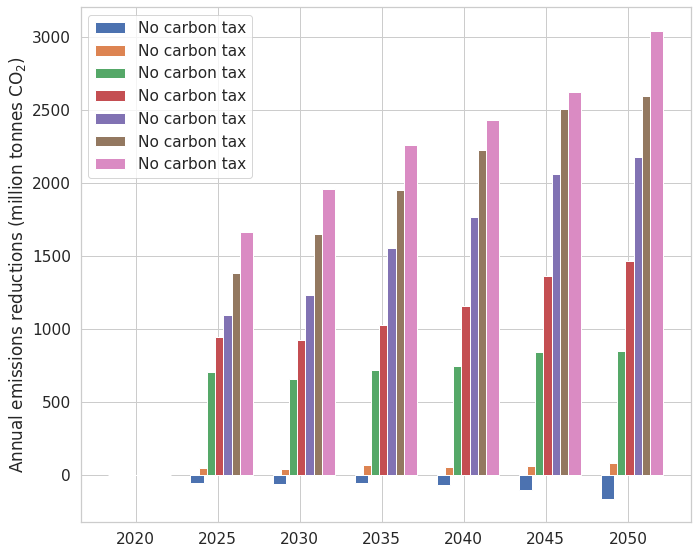

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
x_adj = -1.25
for db in list_of_DBs:
    if db !=base:
        try:
            scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
        except:
            scen_name = map_scenario_names['']
        ax.bar(emis_reductions[db].index + x_adj,emis_reductions[db]['emissions'], label = scen_name)
        x_adj+=0.5
plt.ylabel('Annual emissions reductions (million tonnes CO$_2$)')
plt.legend()
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_mitigation_curve.jpg')


In [35]:
# fig, ax = plt.subplots(figsize=(10,8))
x_adj = -1.25
all_emiss_db = pd.DataFrame(index = [2020, 2025, 2030, 2035, 2040, 2045, 2050])
for db in list_of_DBs:
    if db !=base:
        dummy = emis_reductions[db]
        
        try:
            scen_name = int(map_scenario_names[db.replace('sqlite','').split('CT')[1]].replace('$/tonne',''))
        except:
            scen_name = 0
        dummy.columns = [scen_name]
        all_emiss_db = pd.merge(all_emiss_db, dummy, left_index= True, right_index=True)
all_emiss_db

,-10,10,100,200,300,400,500
2020,1.818989e-12,-9.094947e-13,-9.094947e-13,-2.728484e-12,-2.728484e-12,-4.547474e-12,9.094947e-13
2025,-5.744561e+01,4.826871e+01,7.003515e+02,9.430930e+02,1.091853e+03,1.381918e+03,1.664550e+03
2030,-6.422540e+01,3.668175e+01,6.532997e+02,9.211713e+02,1.230383e+03,1.650798e+03,1.956162e+03
2035,-5.962839e+01,6.782927e+01,7.155486e+02,1.025245e+03,1.553076e+03,1.950417e+03,2.260195e+03
2040,-7.093354e+01,5.148444e+01,7.426683e+02,1.155758e+03,1.765291e+03,2.225288e+03,2.432806e+03
2045,-1.064066e+02,5.571457e+01,8.379535e+02,1.363562e+03,2.064070e+03,2.507763e+03,2.626591e+03
2050,-1.667094e+02,8.162671e+01,8.476383e+02,1.467175e+03,2.178318e+03,2.599885e+03,3.046109e+03


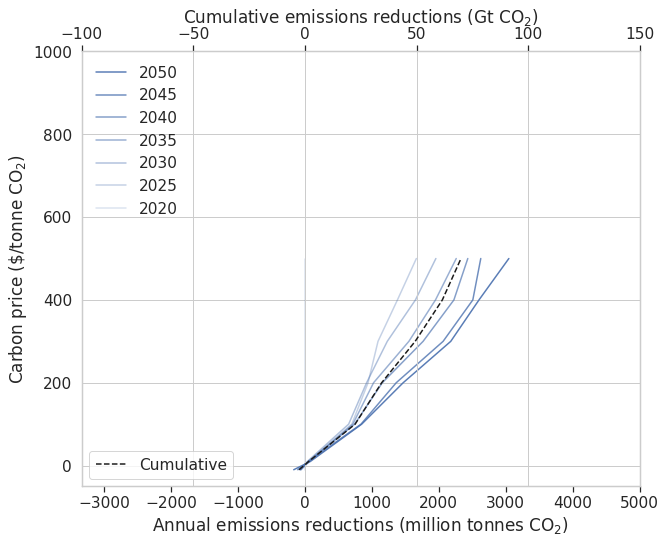

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
aa = 0.2
for ind, row in all_emiss_db.iterrows():
    plt.plot(row.values, row.index, color = 'b', alpha=aa, label = ind)
    aa+=0.12
plt.xlabel('Annual emissions reductions (million tonnes CO$_2$)')
plt.ylabel('Carbon price (\$/tonne CO$_2$)')

plt.legend()
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.ylim([-50,1000])
plt.xlim([-2000, 5000])
ax2 = ax.twiny()
sum_emissions = all_emiss_db.sum()/1000*5
ax2.plot(sum_emissions.values,sum_emissions.index,  'k--', label='Cumulative')
# ax2.plot(all_emiss_db.loc[2050]*30/1000, sum_emissions.index, edgecolor="None")
# ax2.plot(all_emiss_db.loc[2020]*30/1000, sum_emissions.index, edgecolor="None")

ax2.set_xlim([-2000/1000*30, 5000/1000*30])
ax2.set_xlabel('Cumulative emissions reductions (Gt CO$_2$)')
ax2.legend(loc = 'lower left')
mpl_axes_aligner.align.xaxes(ax, 0, ax2, 0, 0.4)
ax.grid(axis='x')
plt.savefig('carbon_tax_figures_updates/carbontax_mitigation_curve_annual_cumulative_PvsQ.jpg')


In [37]:
dummy =pd.DataFrame(sum_emissions)
# dummy.loc[0] = 0
dummy.sort_index(inplace=True)
# dummy['diff'] = dummy[0].diff()
# dummy.fillna(0, inplace=True)
dummy.reset_index(inplace=True)
dummy

,index,0
0,-10,-2.626745
1,10,1.708027
2,100,22.487300
3,200,34.380018
4,300,49.414953
5,400,61.580349
6,500,69.932062


In [38]:
def resource_curve_plot(df_all, xlabel):
    fig, ax = plt.subplots(figsize=(8,6))
    
    df_sel = df_all[df_all[0]>0]

    start =0
    for ind, row in df_sel.iterrows():
        x = start + (row[0]-start)/2
        plt.bar(x, row['index'] , width=row[0]-start, color='b')
        start = row[0]
        
    df_sel = df_all[df_all[0]<0]
    df_sel.sort_index(ascending=False, inplace=True)
    start =0
    for ind, row in df_sel.iterrows():
        x = start + (row[0]-start)/2
        plt.bar(x, row['index'] , width=row[0]-start, color='b')
        start = row[0]
    
    plt.ylabel('Carbon tax (\$/tonne CO$_2$)')
    plt.xlabel(xlabel)
    plt.tight_layout()
#     plt.savefig(country + '_resource_curve.jpg', dpi=400)

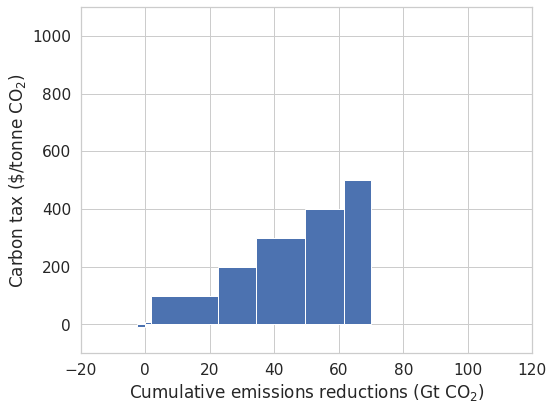

In [39]:
resource_curve_plot(pd.DataFrame(sum_emissions).reset_index(), xlabel = 'Cumulative emissions reductions (Gt CO$_2$)')
# plt.plot(sum_emissions.values,sum_emissions.index,  'k--', label='Cumulative')
plt.xlim([-20, 120])
plt.ylim([-100, 1100])
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/co2_mitigation_curve_stacked_alt.jpg', dpi=400)

KeyError: 0

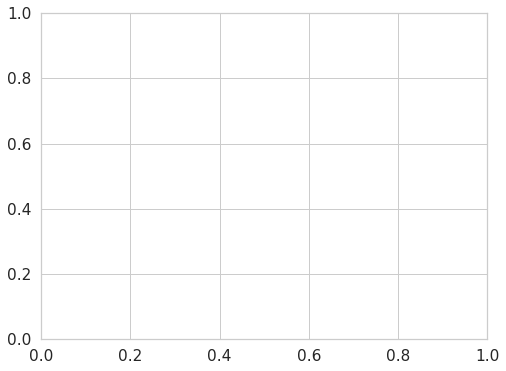

In [40]:
resource_curve_plot(all_emiss_db.loc[2020], '2020 annual emissions reductions (million tonnes CO$_2$/year)')

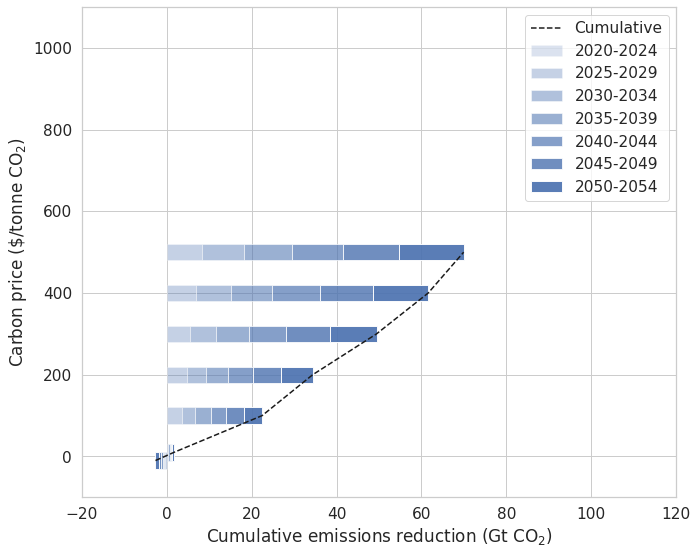

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
all_emiss_db_cumu = all_emiss_db*5/1000
# all_emiss_db_cumu = all_emiss_db_cumu.loc[:,[100, 250, 400, 600]]
bottom = np.zeros(len(all_emiss_db_cumu.columns))
aa = 0.2
for ind, row in all_emiss_db_cumu.iterrows():
    ax.barh(y = row.index, width = row.values,height = 40, left=bottom, label=str(ind) + '-' + str(ind+4),  color = 'b', alpha=aa)
    bottom += row.values
    aa+=0.12
ax.plot(sum_emissions.values,sum_emissions.index,  'k--', label='Cumulative')
plt.xlabel('Cumulative emissions reduction (Gt CO$_2$)')
plt.ylabel('Carbon price (\$/tonne CO$_2$)')
plt.xlim([-20, 120])
plt.ylim([-100, 1100])
plt.legend()
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_mitigation_curve_stackedbarh.jpg')


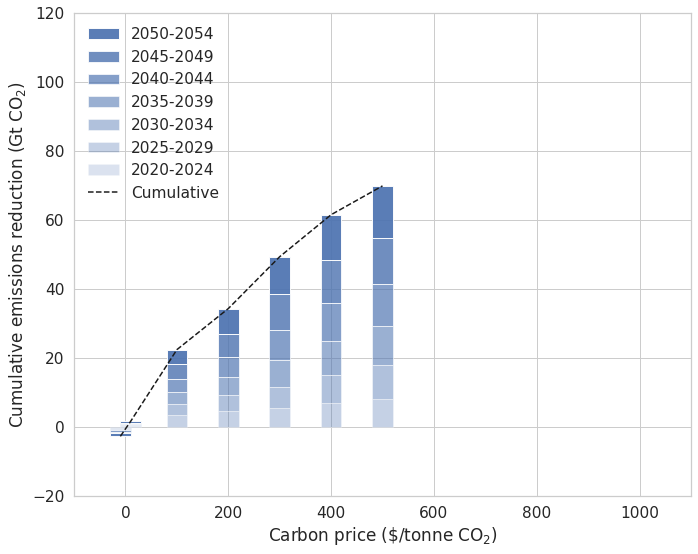

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
all_emiss_db_cumu = all_emiss_db*5/1000
bottom = np.zeros(len(all_emiss_db_cumu.columns))
aa = 0.2
for ind, row in all_emiss_db_cumu.iterrows():
    ax.bar(x = row.index, height = row.values,width = 40, bottom=bottom, label=str(ind) + '-' + str(ind+4),  color = 'b', alpha=aa)
    bottom += row.values
    aa+=0.12
plt.ylim([-20, 120])
plt.xlim([-100, 1100])
ax.plot(sum_emissions.index, sum_emissions.values, 'k--', label='Cumulative')

plt.legend()
plt.ylabel('Cumulative emissions reduction (Gt CO$_2$)')
plt.xlabel('Carbon price (\$/tonne CO$_2$)')

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_mitigation_curve_stackedbarv.jpg')


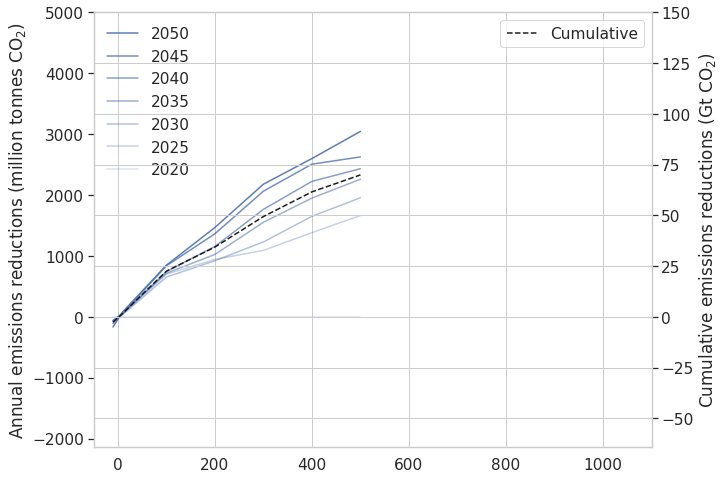

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
aa = 0.2
for ind, row in all_emiss_db.iterrows():
    row.plot(ax=ax, color = 'b', alpha=aa, label = ind)
    aa+=0.12
plt.ylabel('Annual emissions reductions (million tonnes CO$_2$)')
plt.legend()
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.xlim([-50,1100])
plt.ylim([-2000, 5000])
ax2 = ax.twinx()
sum_emissions = all_emiss_db.sum()/1000*5
ax2.plot(sum_emissions.index, sum_emissions.values, 'k--', label='Cumulative')
# ax2.plot(sum_emissions.index, all_emiss_db.loc[2050]*30/1000, edgecolor="None")
# ax2.plot(sum_emissions.index, all_emiss_db.loc[2020]*30/1000, edgecolor="None")

ax2.set_ylim([-2000/1000*30, 5000/1000*30])
ax2.set_ylabel('Cumulative emissions reductions (Gt CO$_2$)')
ax2.legend()
mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.3)
ax.grid(axis='y')
plt.savefig('carbon_tax_figures_updates/carbontax_mitigation_curve_annual_cumulative.jpg')


3992.5384187624477
3825.828976265355
3744.2022668633163
2978.190649859003
2358.654409597703
1647.5111792278342
1225.94386844026
779.7201676758104


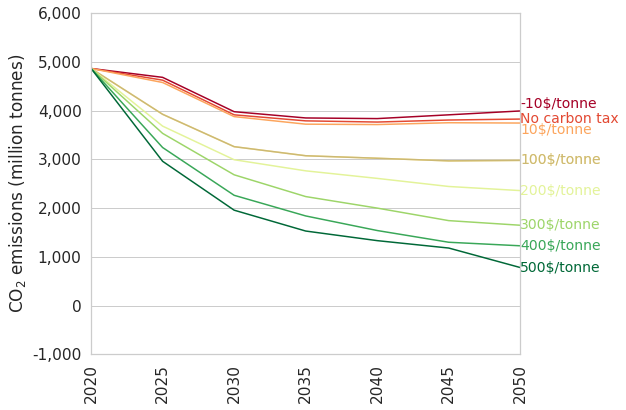

In [45]:
# output_list = []
fig, ax = plt.subplots(figsize=(9,6))

max_val = -1

n = len(list_of_DBs)
colors = plt.cm.RdYlGn(np.linspace(0,1,n))

i=0
for db, conn, scenario in zip(list_of_DBs,list_of_conns, list_of_scenarios):
    query = "SELECT t_periods, sum(emissions) as emissions FROM Output_Emissions \
    WHERE emissions_comm='co2'GROUP BY t_periods"
    df_read_emissions = pd.read_sql_query(query, conn)
    df_read_emissions['emissions']/=1000
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('CT')[1]]
    except:
        scen_name = map_scenario_names['']
    plt.plot(df_read_emissions['t_periods'], df_read_emissions['emissions'],label=scen_name, color = colors[i])
    if scen_name =='100$/tonne':
        plt.plot(df_read_emissions['t_periods'], df_read_emissions['emissions'],label=scen_name, color = 'y')

    max_val = max(max_val, df_read_emissions['emissions'].max())
    va = 'center'
    if '-10$' in scen_name:
        va = 'bottom'
    elif '10$' in scen_name:
        va = 'top'
    plt.annotate(scen_name, (2050, df_read_emissions['emissions'].iloc[-1]), \
                 rotation = 'horizontal', \
                 horizontalalignment='left', verticalalignment=va, fontsize=14, color = colors[i])
    if scen_name =='100$/tonne':
        plt.annotate(scen_name, (2050, df_read_emissions['emissions'].iloc[-1]), \
                 rotation = 'horizontal', \
                 horizontalalignment='left', verticalalignment=va, fontsize=14, color = 'y')
    i+=1
    print(df_read_emissions.iloc[-1,-1])
    
plt.ylim([-1000, 6000])
# plt.xlim([2020, 2053])
ax.grid(axis='x')
plt.xlim([df_read_emissions['t_periods'].min(), df_read_emissions['t_periods'].max()])
plt.xticks(rotation='vertical')
ax.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.legend(frameon=False)
plt.ylabel('CO$_2$ emissions (million tonnes)')
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_co2_emissions.jpg')


In [ ]:
df_sector_emissions

In [ ]:
df_sector_emissions_all = pd.DataFrame()
for db, conn, scenario in zip(list_of_DBs,list_of_conns, list_of_scenarios):
    query = "SELECT tech, sum(emissions) as emissions FROM Output_Emissions \
    WHERE emissions_comm='co2' AND t_periods = 2050 AND sector='transport' GROUP BY tech"
    df_sector_emissions = pd.read_sql_query(query, conn)
    df_sector_emissions['emissions']/=1000
#     mask = (df_sector_emissions['sector'].isin(['commercial','residential']))
#     bldg = df_sector_emissions[mask]
#     df_sector_emissions.loc[len(df_sector_emissions),:] = ['buildings', bldg['emissions'].sum()]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]].replace('$/tonne','')
    except:
        scen_name = 0 #map_scenario_names['']
    df_sector_emissions.loc[:,'db'] = int(scen_name)
    df_sector_emissions_all = pd.concat([df_sector_emissions_all, df_sector_emissions])
df_sector_emissions_all

In [ ]:
df_sector_emissions_all[(df_sector_emissions_all['db']==1000) & (df_sector_emissions_all['emissions']>0)].sum()

In [ ]:
df_sector_emissions_all = pd.DataFrame()
for db, conn, scenario in zip(list_of_DBs,list_of_conns, list_of_scenarios):
    query = "SELECT sector, sum(emissions) as emissions FROM Output_Emissions \
    WHERE emissions_comm='co2' AND t_periods = 2050 GROUP BY sector"
    df_sector_emissions = pd.read_sql_query(query, conn)
    df_sector_emissions['emissions']/=1000
    mask = (df_sector_emissions['sector'].isin(['commercial','residential']))
    bldg = df_sector_emissions[mask]
    df_sector_emissions.loc[len(df_sector_emissions),:] = ['buildings', bldg['emissions'].sum()]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]].replace('$/tonne','')
    except:
        scen_name = 0 #map_scenario_names['']
    df_sector_emissions.loc[:,'db'] = int(scen_name)
    df_sector_emissions_all = pd.concat([df_sector_emissions_all, df_sector_emissions])
df_sector_emissions_all

In [ ]:
fig, ax = plt.subplots(figsize=(7,6))
for sector in df_sector_emissions_all['sector'].unique():
    if sector in ['buildings','electric','industrial','transport']:
        df_sector_plot = df_sector_emissions_all[df_sector_emissions_all['sector']==sector]
        plt.plot(df_sector_plot['db'], df_sector_plot['emissions'], label=sector)

plt.legend(frameon=False)
plt.ylim([-400, 1400])
plt.xlim([-100, 1000])
plt.ylabel('CO$_2$ emissions in 2050 (million tonnes)')
plt.xlabel('Carbon tax ($/tonne)')
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/sectoral_co2_20450.jpg', dpi=400)

In [ ]:
list_of_DBs = ['US_9R_8D_CT_neg50.sqlite', 'US_9R_8D_CT_neg10.sqlite',  \
               'US_9R_8D_CT_0.sqlite', 'US_9R_8D_CT_10.sqlite', 'US_9R_8D_CT_50.sqlite']

list_of_scenarios  = ['test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run','test_run']

list_of_conns = [sqlite3.connect(db) for db in list_of_DBs]

In [ ]:
output_list = []
scen_name_all = []
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):

    query = "SELECT t_periods, tech, sum(vflow_out) FROM Output_VFlow_Out WHERE input_comm LIKE 'ethos%' AND tech NOT LIKE '%_emissions%' \
    GROUP BY t_periods, tech"
    df_s = pd.read_sql_query(query, conn)

    ethos_tech_map = dict()
    ethos_tech_map['E_SOLPV'] = 'Solar'
    ethos_tech_map['SOLELC'] = 'Solar'
    ethos_tech_map['E_WND'] = 'Wind'
    ethos_tech_map['E_OFWND_N'] = 'Wind'
    ethos_tech_map['E_GEO'] = 'Other Renewables'
    ethos_tech_map['E_HYD'] = 'Other Renewables'
    ethos_tech_map['Corn'] = 'Biomass'
    ethos_tech_map['Herbaceous'] = 'Biomass'
    ethos_tech_map['Soybeans'] = 'Biomass'
    ethos_tech_map['Waste'] = 'Biomass'
    ethos_tech_map['Woody'] = 'Biomass'
    ethos_tech_map['DFO'] = 'Petroleum'
    ethos_tech_map['DISTOIL'] = 'Petroleum'
    ethos_tech_map['IMPRESNGA'] = 'Natural Gas'
    ethos_tech_map['IMPELCNGA_S3'] = 'Natural Gas'
    ethos_tech_map['IMPCOMNGA'] = 'Natural Gas'
#     ethos_tech_map['NGA'] = 'Natural Gas'
    ethos_tech_map['INDNG'] = 'Natural Gas'
    ethos_tech_map['CNG'] = 'Natural Gas'
    ethos_tech_map['LNG'] = 'Natural Gas'
    ethos_tech_map['COAL'] = 'Coal'
    ethos_tech_map['COAB'] = 'Coal'
    ethos_tech_map['COAS'] = 'Coal'
    ethos_tech_map['URN'] = 'Nuclear'
    ethos_tech_map['RFO'] = 'Petroleum'
    ethos_tech_map['BIO'] = 'Biomass'
    ethos_tech_map['REN'] = 'Biomass'
    ethos_tech_map['GAS'] = 'Petroleum'
    ethos_tech_map['JTF'] = 'Petroleum'
    ethos_tech_map['LPG'] = 'Petroleum'
    ethos_tech_map['DSL'] = 'Petroleum'
    ethos_tech_map['GSL'] = 'Petroleum'
    ethos_tech_map['MGO'] = 'Petroleum'
    ethos_tech_map['IMPINDOTH'] = 'Petroleum'


    for key in ethos_tech_map.keys():
        mask = df_s['tech'].str.contains(key)
        df_s.loc[mask,'tech_rev'] = ethos_tech_map[key]
    
    df_s_pivot = df_s.groupby(by=['t_periods', 'tech_rev']).sum().reset_index()
    df_s_pivot = df_s_pivot.pivot_table(index='tech_rev', columns='t_periods')
    df_s_pivot.fillna(0, inplace=True)
    df_s_pivot.columns = [x[1] for x in df_s_pivot.columns]
    
    df_s_pivot = df_s_pivot.loc[['Coal','Petroleum','Natural Gas','Nuclear','Other Renewables','Biomass','Solar','Wind']]
    df_s_pivot /= 1000
    output_list.append(df_s_pivot)
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
        
    scen_name_all.append(scen_name)
# fig, ax = plt.subplots(figsize=(12,6))

# ax = func_stacked_plot(output_list, col_order = ['Coal','Petroleum','Natural Gas','Nuclear',\
#                                                        'Other Renewables','Biomass','Solar','Wind'])

# ax.grid(axis='x')

# plt.ylabel('Primary energy consumption (EJ)')
# plt.tight_layout()
# plt.savefig('carbon_tax_figures_updates/'+list_of_DBs[0].replace('.sqlite','_compare_scens_primaryenergy.jpg'))


fig, ax = plt.subplots(figsize=(16,6))
for ind_iter in np.arange(len(output_list)):
    subp = plt.subplot(1,len(output_list)+2,ind_iter+1)
    plt.stackplot(output_list[ind_iter].columns, output_list[ind_iter],  alpha = 0.75, labels=output_list[ind_iter].index, \
                     colors = output_list[ind_iter].index.map(tech_colormap))
    
    
    if ind_iter==0:
        plt.ylabel('Primary energy consumption (EJ)')
    else:
        subp.set(yticklabels=[])

    plt.grid(axis='x')
    plt.xticks(rotation='vertical')
    plt.xlim([output_list[ind_iter].columns.min(), output_list[ind_iter].columns.max()])
    plt.title(scen_name_all[ind_iter])
    plt.ylim([0, 100])

# handles, labels = subp.get_legend_handles_labels()
# unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
#           if l not in labels[:i]]
subp = plt.subplot(1,len(output_list)+2,ind_iter+2)
# subp.legend(handles[::-1], labels[::-1], loc='upper left', frameon=False)

# dummy_df = pd.DataFrame(index=output_list[ind_iter].index, columns=output_list[ind_iter].columns)
# dummy_df.transpose().plot.bar(kind='stacked',ax=subp, color = output_list[ind_iter].index.map(tech_colormap))
# subp.set(yticklabels=[],xticklabels=[] )
plt.legend(loc='upper left')
plt.grid(False)
plt.axis('off')

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_primaryenergy.jpg')


In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
plt.ylim([-15, 20])
plt.ylabel('Difference in primary energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend(frameon=False)

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_primaryenergy_diff.jpg')

In [ ]:
output_list = []
scen_name_all = []
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):

    query = "SELECT t_periods, tech, sum(vflow_out) FROM Output_VFlow_Out WHERE input_comm LIKE 'ethos%' AND tech NOT LIKE '%_emissions%' \
    AND tech LIKE '%NGA%' GROUP BY t_periods, tech"
    df_s = pd.read_sql_query(query, conn)
    df_s_pivot = df_s.pivot_table(index='tech', columns='t_periods')
    output_list.append(df_s_pivot)


In [ ]:
region = 'US'
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    
    if region=='US':
        query = "SELECT tech, t_periods, sum(vflow_out) as vflow_out FROM Output_VFlow_Out WHERE \
        sector = 'electric' AND scenario='" + scenario + "' \
        AND vflow_out > 1e-3 GROUP BY tech, t_periods"
    else:
        query = "SELECT regions, tech, t_periods, sum(vflow_out) as vflow_out FROM Output_VFlow_Out WHERE \
        sector = 'electric' AND scenario='" + scenario + "' \
        AND vflow_out > 1e-3 GROUP BY regions, tech, t_periods"

    df_s = pd.read_sql_query(query, conn)
    df_plot = df_s.groupby(['tech' , 't_periods']).sum().pivot_table(values='vflow_out', index='tech', columns='t_periods')
    df_plot = df_plot[~df_plot.index.str.contains('TRANS')]
    df_plot = df_plot[~df_plot.index.str.contains('BLND')]
    df_plot = df_plot[~df_plot.index.str.contains('_emissions')]
    
#     df_stor = pd.read_sql_query("SELECT DISTINCT tech FROM StorageDuration", conn)
#     df_plot = df_plot[~df_plot.index.isin(df_stor['tech'])]
    
    df_plot.loc[:,'agg_tech'] = [map_plants[y] for x in df_plot.index for y in map_plants.keys() if y.lower() in x.lower()] #map agg technologies

    df_plot = df_plot.groupby('agg_tech').sum()
    df_plot = df_plot.loc[:, df_plot.columns >= 2020]
    df_plot.fillna(0, inplace=True)
    df_plot*=0.277778

    df_plot = df_plot[[2020, 2030, 2040, 2050]]

    output_list.append(df_plot)


ax = func_stacked_plot(output_list)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.5) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1

ax.grid(axis='x')
plt.ylim([0, 6000])
ax.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Generation (TWh)')
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_gen.jpg')



In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(color_dict), legend=False)
# plt.ylim([-15, 20])
plt.ylabel('Difference in 2050 electricity generation (TWh) \n relative to preceding scenario (to the left)')
plt.legend(frameon=False)

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_gen_diff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'transport', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_transport)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Jet Fuel','Diesel','Gasoline','Biodiesel','Ethanol','Synthetic Fuel','Electricity','Hydrogen']
    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2030, 2040, 2050]]

    
    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = ['Other Fossil', 'Jet Fuel','Diesel','Gasoline','Biodiesel',\
                                                 'Ethanol','Synthetic Fuel','Electricity','Hydrogen'], color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.5) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1

plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,30])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_transport.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_transportdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'industrial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_industrial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Coal','Diesel','Gasoline','Natural Gas', 'Biomass','Synthetic Natural Gas',\
                   'Electricity', 'Hydrogen']
    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2030, 2040, 2050]]

    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = ['Other Fossil', 'Coal','Diesel','Gasoline','Natural Gas', 'Biomass','Synthetic Natural Gas',\
                   'Electricity', 'Hydrogen'], color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,30])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_industrial.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_industrialdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'residential', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_residential)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Biomass','Natural Gas','Residential Solar','Synthetic Natural Gas', 'Electricity', 'Hydrogen']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_res = df_plot_copy[[2020, 2030, 2040, 2050]]
    
    df_plot = stacked_penergy_sector(conn, scenario, 'commercial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_commercial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Natural Gas','Synthetic Natural Gas','Electricity']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_comm = df_plot_copy[[2020, 2030, 2040, 2050]]
    
    df_plot_bld = pd.concat([df_plot_res, df_plot_comm]).groupby('input_comm').sum()
    output_list.append(df_plot_bld)
    
fuels_order = ['Other Fossil', 'Biomass','Natural Gas','Residential Solar','Synthetic Natural Gas', 'Electricity', 'Hydrogen']
ax = func_stacked_plot(output_list, col_order = fuels_order, color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,25])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_buildings.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_buildingsdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'commercial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_commercial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Natural Gas','Synthetic Natural Gas','Electricity']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2030, 2040, 2050]]

    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = fuels_order, color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,15])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_commercial.jpg')

In [ ]:
list_of_DBs = ['US_9R_8D_CT_0.sqlite', 'US_9R_8D_CT_10.sqlite', 'US_9R_8D_CT_50.sqlite', 'US_9R_8D_CT_100.sqlite', 'US_9R_8D_CT_200.sqlite',  \
               'US_9R_8D_CT_400.sqlite', 'US_9R_8D_CT_600.sqlite', 'US_9R_8D_CT_800.sqlite', 'US_9R_8D_CT_1000.sqlite']

list_of_scenarios  = ['test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run', 'test_run','test_run','test_run', 'test_run','test_run']

list_of_conns = [sqlite3.connect(db) for db in list_of_DBs]

In [ ]:
output_list = []
scen_name_all = []
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):

    query = "SELECT t_periods, tech, sum(vflow_out) FROM Output_VFlow_Out WHERE input_comm LIKE 'ethos%' AND tech NOT LIKE '%_emissions%' \
    GROUP BY t_periods, tech"
    df_s = pd.read_sql_query(query, conn)

    ethos_tech_map = dict()
    ethos_tech_map['E_SOLPV'] = 'Solar'
    ethos_tech_map['SOLELC'] = 'Solar'
    ethos_tech_map['E_WND'] = 'Wind'
    ethos_tech_map['E_OFWND_N'] = 'Wind'
    ethos_tech_map['E_GEO'] = 'Other Renewables'
    ethos_tech_map['E_HYD'] = 'Other Renewables'
    ethos_tech_map['Corn'] = 'Biomass'
    ethos_tech_map['Herbaceous'] = 'Biomass'
    ethos_tech_map['Soybeans'] = 'Biomass'
    ethos_tech_map['Waste'] = 'Biomass'
    ethos_tech_map['Woody'] = 'Biomass'
    ethos_tech_map['DFO'] = 'Petroleum'
    ethos_tech_map['DISTOIL'] = 'Petroleum'
    ethos_tech_map['IMPRESNGA'] = 'Natural Gas'
    ethos_tech_map['IMPELCNGA_S3'] = 'Natural Gas'
    ethos_tech_map['IMPCOMNGA'] = 'Natural Gas'
#     ethos_tech_map['NGA'] = 'Natural Gas'    
    ethos_tech_map['INDNG'] = 'Natural Gas'
    ethos_tech_map['CNG'] = 'Natural Gas'
    ethos_tech_map['LNG'] = 'Natural Gas'
    ethos_tech_map['COAL'] = 'Coal'
    ethos_tech_map['COAB'] = 'Coal'
    ethos_tech_map['COAS'] = 'Coal'
    ethos_tech_map['URN'] = 'Nuclear'
    ethos_tech_map['RFO'] = 'Petroleum'
    ethos_tech_map['BIO'] = 'Biomass'
    ethos_tech_map['REN'] = 'Biomass'
    ethos_tech_map['GAS'] = 'Petroleum'
    ethos_tech_map['JTF'] = 'Petroleum'
    ethos_tech_map['LPG'] = 'Petroleum'
    ethos_tech_map['DSL'] = 'Petroleum'
    ethos_tech_map['GSL'] = 'Petroleum'
    ethos_tech_map['MGO'] = 'Petroleum'
    ethos_tech_map['IMPINDOTH'] = 'Petroleum'


    for key in ethos_tech_map.keys():
        mask = df_s['tech'].str.contains(key)
        df_s.loc[mask,'tech_rev'] = ethos_tech_map[key]
    
    df_s_pivot = df_s.groupby(by=['t_periods', 'tech_rev']).sum().reset_index()
    df_s_pivot = df_s_pivot.pivot_table(index='tech_rev', columns='t_periods')
    df_s_pivot.fillna(0, inplace=True)
    df_s_pivot.columns = [x[1] for x in df_s_pivot.columns]
    
    df_s_pivot = df_s_pivot.loc[['Coal','Petroleum','Natural Gas','Nuclear','Other Renewables','Biomass','Solar','Wind']]
    df_s_pivot /= 1000
    output_list.append(df_s_pivot)
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
        
    scen_name_all.append(scen_name)
# fig, ax = plt.subplots(figsize=(12,6))

# ax = func_stacked_plot(output_list, col_order = ['Coal','Petroleum','Natural Gas','Nuclear',\
#                                                        'Other Renewables','Biomass','Solar','Wind'])

# ax.grid(axis='x')

# plt.ylabel('Primary energy consumption (EJ)')
# plt.tight_layout()
# plt.savefig('carbon_tax_figures_updates/'+list_of_DBs[0].replace('.sqlite','_compare_scens_primaryenergy.jpg'))


fig, ax = plt.subplots(figsize=(16,6))
for ind_iter in np.arange(len(output_list)):
    subp = plt.subplot(1,len(output_list)+2,ind_iter+1)
    plt.stackplot(output_list[ind_iter].columns, output_list[ind_iter],  alpha = 0.75, labels=output_list[ind_iter].index, \
                     colors = output_list[ind_iter].index.map(tech_colormap))
    
    
    if ind_iter==0:
        plt.ylabel('Primary energy consumption (EJ)')
    else:
        subp.set(yticklabels=[])

    plt.grid(axis='x')
    plt.xticks(rotation='vertical')
    plt.xlim([output_list[ind_iter].columns.min(), output_list[ind_iter].columns.max()])
    plt.title(scen_name_all[ind_iter])
    plt.ylim([0, 100])

# handles, labels = subp.get_legend_handles_labels()
# unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
#           if l not in labels[:i]]
subp = plt.subplot(1,len(output_list)+2,ind_iter+2)
# subp.legend(handles[::-1], labels[::-1], loc='upper left', frameon=False)

# dummy_df = pd.DataFrame(index=output_list[ind_iter].index, columns=output_list[ind_iter].columns)
# dummy_df.transpose().plot.bar(kind='stacked',ax=subp, color = output_list[ind_iter].index.map(tech_colormap))
# subp.set(yticklabels=[],xticklabels=[] )
plt.legend(loc='upper left')
plt.grid(False)
plt.axis('off')

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_highC_primaryenergy.jpg')


In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
plt.ylim([-15, 20])
plt.ylabel('Difference in primary energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend(frameon=False)

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_highC_primaryenergy_diff.jpg')


In [ ]:
region = 'US'
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    
    if region=='US':
        query = "SELECT tech, t_periods, sum(vflow_out) as vflow_out FROM Output_VFlow_Out WHERE \
        sector = 'electric' AND scenario='" + scenario + "' \
        AND vflow_out > 1e-3 GROUP BY tech, t_periods"
    else:
        query = "SELECT regions, tech, t_periods, sum(vflow_out) as vflow_out FROM Output_VFlow_Out WHERE \
        sector = 'electric' AND scenario='" + scenario + "' \
        AND vflow_out > 1e-3 GROUP BY regions, tech, t_periods"

    df_s = pd.read_sql_query(query, conn)
    df_plot = df_s.groupby(['tech' , 't_periods']).sum().pivot_table(values='vflow_out', index='tech', columns='t_periods')
    df_plot = df_plot[~df_plot.index.str.contains('TRANS')]
    df_plot = df_plot[~df_plot.index.str.contains('BLND')]
    df_plot = df_plot[~df_plot.index.str.contains('_emissions')]
    
#     df_stor = pd.read_sql_query("SELECT DISTINCT tech FROM StorageDuration", conn)
#     df_plot = df_plot[~df_plot.index.isin(df_stor['tech'])]
    
    df_plot.loc[:,'agg_tech'] = [map_plants[y] for x in df_plot.index for y in map_plants.keys() if y.lower() in x.lower()] #map agg technologies

    df_plot = df_plot.groupby('agg_tech').sum()
    df_plot = df_plot.loc[:, df_plot.columns >= 2020]
    df_plot.fillna(0, inplace=True)
    df_plot*=0.277778
    
    df_plot = df_plot[[2020, 2030, 2040, 2050]]
    output_list.append(df_plot)


ax = func_stacked_plot(output_list)
num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
ax.grid(axis='x')
plt.ylim([0, 12000])
ax.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Generation (TWh)')
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_highC_gen.jpg')



In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(color_dict), legend=False)
# plt.ylim([-15, 20])
plt.ylabel('Difference in 2050 electricity generation (TWh) \n relative to preceding scenario (to the left)')
plt.legend(frameon=False)

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_scens_highC_gen_diff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'transport', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_transport)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Jet Fuel','Diesel','Gasoline','Biodiesel','Ethanol','Synthetic Fuel','Electricity','Hydrogen']
    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2030, 2040, 2050]]

    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = ['Other Fossil', 'Jet Fuel','Diesel','Gasoline','Biodiesel',\
                                                 'Ethanol','Synthetic Fuel','Electricity','Hydrogen'], color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,30])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_transport.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_transportdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'industrial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_industrial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Coal','Diesel','Gasoline','Natural Gas', 'Biomass','Synthetic Natural Gas',\
                   'Electricity', 'Hydrogen']
    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2030, 2040, 2050]]

    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = ['Other Fossil', 'Coal','Diesel','Gasoline','Natural Gas', 'Biomass','Synthetic Natural Gas',\
                   'Electricity', 'Hydrogen'], color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,30])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_industrial.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_industrialdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'residential', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_residential)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Biomass','Natural Gas','Residential Solar','Synthetic Natural Gas', 'Electricity', 'Hydrogen']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_res = df_plot_copy[[2020, 2030, 2040, 2050]]
    
    df_plot = stacked_penergy_sector(conn, scenario, 'commercial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_commercial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Natural Gas','Synthetic Natural Gas','Electricity']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_comm = df_plot_copy[[2020, 2030, 2040, 2050]]
    
    df_plot_bld = pd.concat([df_plot_res, df_plot_comm]).groupby('input_comm').sum()
    output_list.append(df_plot_bld)
    
fuels_order = ['Other Fossil', 'Biomass','Natural Gas','Residential Solar','Synthetic Natural Gas', 'Electricity', 'Hydrogen']
ax = func_stacked_plot(output_list, col_order = fuels_order, color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,25])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_buildings.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_buidlingsdiff.jpg')


In [ ]:
output_list = []
fig, ax = plt.subplots(figsize=(10,6))
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_plot = stacked_penergy_sector(conn, scenario, 'commercial', 'All')
    df_plot /=1000
    df_plot_copy = df_plot.copy()
    df_plot_copy.index = df_plot_copy.index.map(tech_commercial)
    df_plot_copy = df_plot_copy.reset_index().groupby(by=['input_comm']).sum()

    fuels_order = ['Other Fossil', 'Natural Gas','Synthetic Natural Gas','Electricity']

    add_ind = [x for x in fuels_order if x not in df_plot_copy.index]
    for ind in add_ind:
        df_plot_copy.loc[ind,:] = 0
    df_plot_copy = df_plot_copy.loc[fuels_order]
    df_plot_copy = df_plot_copy[[2020, 2030, 2040, 2050]]

    output_list.append(df_plot_copy)
ax = func_stacked_plot(output_list, col_order = fuels_order, color_dict = tech_colormap)

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.4) for x in np.arange(num_dfs)]
i = 0
period_placement= 2020
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
plt.ylabel('Energy consumption (EJ)')
plt.grid(axis='x')
plt.ylim([0,15])

plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_commercial.jpg')

In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(tech_colormap), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (EJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_commercialdiff.jpg')


In [ ]:
output_list = []

for conn, scenario in zip(list_of_conns, list_of_scenarios):

    query = "SELECT t_periods, tech, sum(emissions) as emissions FROM Output_Emissions \
        WHERE emissions_comm='co2' AND emissions <-0.001 GROUP BY t_periods, tech"
    df_read_emissions_cdr = pd.read_sql_query(query, conn)
    df_read_emissions_cdr['emissions']/=1000
    df_read_emissions_cdr = df_read_emissions_cdr.pivot_table(index='tech', columns='t_periods', values = 'emissions')
    output_list.append(df_read_emissions_cdr)


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
i=0
plt.xlim([2020, 2050])
for db in output_list:
    
    try:
        scen_name = map_scenario_names[list_of_DBs[i].replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.plot(-db.loc['CO2_Capture_ground'], label = scen_name)
    i+=1
    
plt.legend()

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

ax.tick_params(axis = 'x', labelrotation=90)
plt.ylim([0, 1400])
plt.ylabel('CO$_2$ DAC to sequestration (million tonnes)')
plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_DAC_ground.jpg')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
i=0
plt.xlim([2020, 2050])
for db in output_list:
    try:
        scen_name = map_scenario_names[list_of_DBs[i].replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    plt.plot(-db.loc['BECCS_H2_N'] - db.loc['E_BECCS_N'], label = scen_name)
    i+=1
    
plt.ylim([0, 1400])
plt.legend()

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='upper left', frameon=False) # changing plt to ax gives you legends for each of the graphs

ax.tick_params(axis = 'x', labelrotation=90)

plt.ylabel('CO$_2$ BECCS (million tonnes)')
plt.savefig('carbon_tax_figures_updates/carbontax_compare_highC_BECCS.jpg')

In [ ]:
#compare hydrogen use across sectors
def return_h2_shares(conn):
    query = "SELECT t_periods, input_comm, sum(vflow_out) as Transport FROM Output_VFlow_Out WHERE sector = 'transport' AND \
    (input_comm = 'H2' OR input_comm = 'LH2' OR input_comm='T_Liquids' OR input_comm='SNG_100' OR input_comm = 'MEOH') GROUP BY t_periods, input_comm"
    df_h2_transport = pd.read_sql_query(query, conn)

    query = "SELECT t_periods,input_comm, sum(vflow_out) as Industrial FROM Output_VFlow_Out WHERE sector = 'industrial' AND \
    (input_comm = 'H2_100' OR input_comm='SNG_100') GROUP BY t_periods, input_comm"
    df_h2_industrial = pd.read_sql_query(query, conn)

    query = "SELECT t_periods, input_comm, sum(vflow_out) as Residential FROM Output_VFlow_Out WHERE sector = 'residential' AND \
    (input_comm = 'SNG_100') GROUP BY t_periods, input_comm"
    df_h2_residential = pd.read_sql_query(query, conn)

    query = "SELECT t_periods, input_comm, sum(vflow_out) as Commercial FROM Output_VFlow_Out WHERE sector = 'commercial' AND \
    (input_comm = 'SNG_100') GROUP BY t_periods, input_comm"
    df_h2_commercial = pd.read_sql_query(query, conn)
    
    query = "SELECT t_periods, sum(vflow_out) as Electric FROM Output_VFlow_Out WHERE sector LIKE 'electric%' AND \
    (input_comm = 'H2_100') GROUP BY t_periods"
    df_h2_electric = pd.read_sql_query(query, conn)

    #t_liquids
    query = "SELECT t_periods, input_comm, sum(vflow_out) AS t_liquids FROM Output_VFlow_Out WHERE  \
    (input_comm = 'H2_100' AND output_comm='T_Liquids' ) GROUP BY t_periods, input_comm"
    df_h2_t_liq_out = pd.read_sql_query(query, conn)

    query = "SELECT t_periods, input_comm, sum(vflow_in) AS h2_100 FROM Output_VFlow_In WHERE  \
    (input_comm = 'H2_100' AND output_comm='T_Liquids' ) GROUP BY t_periods, input_comm"
    df_h2_t_liq_in = pd.read_sql_query(query, conn)

    df_h2_t_liq = pd.merge(df_h2_t_liq_in, df_h2_t_liq_out)
    df_h2_t_liq['ratio'] = df_h2_t_liq['h2_100']/df_h2_t_liq['t_liquids']

    mask = df_h2_transport['input_comm']=='T_Liquids'
    ratios = df_h2_transport.loc[mask].merge(df_h2_t_liq, on='t_periods', how='left')['ratio'].values
    df_h2_transport.loc[mask, 'Transport'] *= ratios
    
    #MEOH
    query = "SELECT t_periods, input_comm, sum(vflow_out) AS meoh FROM Output_VFlow_Out WHERE  \
    (input_comm = 'H2_100' AND output_comm='MEOH' ) GROUP BY t_periods, input_comm"
    df_h2_meoh_out = pd.read_sql_query(query, conn)

    query = "SELECT t_periods, input_comm, sum(vflow_in) AS h2_100 FROM Output_VFlow_In WHERE  \
    (input_comm = 'H2_100' AND output_comm='MEOH' ) GROUP BY t_periods, input_comm"
    df_h2_meoh_in = pd.read_sql_query(query, conn)

    df_h2_meoh = pd.merge(df_h2_meoh_in, df_h2_meoh_out)
    df_h2_meoh['ratio'] = df_h2_meoh['h2_100']/df_h2_meoh['meoh']

    mask = df_h2_transport['input_comm']=='MEOH'
    ratios = df_h2_transport.loc[mask].merge(df_h2_meoh, on='t_periods', how='left')['ratio'].values
    df_h2_transport.loc[mask, 'Transport'] *= ratios


    #SNG
    query = "SELECT t_periods, input_comm, sum(vflow_out) AS sng_20 FROM Output_VFlow_Out WHERE  \
    (input_comm = 'H2_100' AND output_comm='SNG_20' ) GROUP BY t_periods, input_comm"
    df_h2_sng_100_out = pd.read_sql_query(query, conn)

    query = "SELECT t_periods, input_comm, sum(vflow_in) AS h2_100 FROM Output_VFlow_In WHERE  \
    (input_comm = 'H2_100' AND output_comm='SNG_20' ) GROUP BY t_periods, input_comm"
    df_h2_sng_100_in = pd.read_sql_query(query, conn)

    df_h2_sng_100 = pd.merge(df_h2_sng_100_in, df_h2_sng_100_out)
    df_h2_sng_100['ratio'] = df_h2_sng_100['h2_100']/df_h2_sng_100['sng_20']

    mask = df_h2_residential['input_comm']=='SNG_100'
    ratios = df_h2_residential.loc[mask].merge(df_h2_sng_100, on='t_periods', how='left')['ratio'].values
    df_h2_residential.loc[mask, 'Residential'] *= ratios

    mask = df_h2_commercial['input_comm']=='SNG_100'
    ratios = df_h2_commercial.loc[mask].merge(df_h2_sng_100, on='t_periods', how='left')['ratio'].values
    df_h2_commercial.loc[mask, 'Commercial'] *= ratios

    mask = df_h2_transport['input_comm']=='SNG_100'
    ratios = df_h2_transport.loc[mask].merge(df_h2_sng_100, on='t_periods', how='left')['ratio'].values
    df_h2_transport.loc[mask, 'Transport'] *= ratios
    
    mask = df_h2_industrial['input_comm']=='SNG_100'
    ratios = df_h2_industrial.loc[mask].merge(df_h2_sng_100, on='t_periods', how='left')['ratio'].values
    df_h2_industrial.loc[mask, 'Industrial'] *= ratios

    df_h2_transport = df_h2_transport.groupby('t_periods')['Transport'].sum().reset_index()
    df_h2_residential = df_h2_residential.groupby('t_periods')['Residential'].sum().reset_index()
    df_h2_commercial = df_h2_commercial.groupby('t_periods')['Commercial'].sum().reset_index()
    df_h2_industrial = df_h2_industrial.groupby('t_periods')['Industrial'].sum().reset_index()

    df_h2 = pd.merge(df_h2_transport, df_h2_industrial, on = 't_periods', how='outer')
    df_h2 = pd.merge(df_h2, df_h2_residential, on = 't_periods', how='outer')
    df_h2 = pd.merge(df_h2, df_h2_commercial, on = 't_periods', how='outer')
    df_h2 = pd.merge(df_h2, df_h2_electric, on = 't_periods', how='outer')

    df_h2 = df_h2.sort_values(by='t_periods')
    df_h2.set_index('t_periods',inplace=True)
    df_h2.fillna(0, inplace=True)
    df_h2[df_h2<0]=0
    return df_h2

output_list = []
for conn, scenario in zip(list_of_conns, list_of_scenarios):
    df_h2 = return_h2_shares(conn)
    output_list.append(df_h2.transpose())

fig, ax = plt.subplots(figsize=(8,6))

func_stacked_plot(output_list, ax= ax, col_order = \
                  ['Electric','Transport', 'Industrial','Residential','Commercial'], loc='inside_upper_left')

num_dfs = len(output_list)
col_spacing = [x - (num_dfs / 1.8 - 0.5) for x in np.arange(num_dfs)]
i = 0
period_placement= 2035
for spacing in col_spacing:
    db = list_of_DBs[i]
    try:
        scen_name = map_scenario_names[db.replace('.sqlite','').split('_')[3]]
    except:
        scen_name = map_scenario_names['']
    plt.annotate(scen_name, (period_placement+spacing, \
                 output_list[i][period_placement].sum()+ output_list[0][period_placement].sum()*0.05), \
                 rotation = 'vertical', \
                 horizontalalignment='center', verticalalignment='bottom', fontsize=14, color='grey')
    i+=1
    
ax.grid(axis='x')
# plt.ylim([0, 5000])
ax.get_yaxis().set_major_formatter(
tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Hydrogen consumption (PJ)')
plt.tight_layout()
plt.savefig('carbon_tax_figures_updates/carbontax_compare_hydrogen_consumption_highC.jpg')


In [ ]:
i = 0
df_diff_all = pd.DataFrame()
for conn, scenario, db in zip(list_of_conns, list_of_scenarios, list_of_DBs):
    if i!=0:
        df_diff = output_list[i] - output_list[i-1]
    else:
        df_diff = output_list[i] - output_list[0]

    try:
        scen_name = map_scenario_names[db.replace('sqlite','').split('_')[4]]
    except:
        scen_name = map_scenario_names['']
    df_diff_all.loc[:, scen_name] = df_diff.loc[:,2050]
    i+=1

fig, ax = plt.subplots(figsize=(9,8))
df_diff_all.transpose().plot(kind='bar',stacked=True, ax = ax, color = df_diff_all.index.map(color_dict), legend=False)
# plt.ylim([-6, 4])
plt.ylabel('Difference in 2050 energy consumption (PJ) \n relative to preceding scenario (to the left)')
plt.legend()

handles, labels = subp.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels))
          if l not in labels[:i]]
plt.legend(*zip(*unique[::-1]), loc='lower left', frameon=False) # changing plt to ax gives you legends for each of the graphs

plt.tight_layout()

plt.savefig('carbon_tax_figures_updates/carbontax_compare_hydrogen_consumption_highC_diff.jpg')
